In [8]:
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow import keras
import numpy as np
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os


In [9]:
model = keras.models.load_model(r"E:\projectDataset\Checkpoints\my_checkpoint_layers2")


In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 220, 220, 64)      36928     
_________________________________________________________________
batch_normalization_10 (Batc (None, 220, 220, 64)      256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 108, 108, 128)     73856     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 106, 106, 128)    

In [11]:
train_data_dir = r'E:\projectDataset\tZoghi\db6\train'
test_data_dir = r'E:\projectDataset\tZoghi\db6\test'
val_data_dir =  r'E:\projectDataset\tZoghi\db6\val'

input_target = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_target,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=input_target,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = test_datagen.flow_from_directory(
val_data_dir,
target_size=input_target,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 10901 images belonging to 6 classes.
Found 1452 images belonging to 6 classes.
Found 1246 images belonging to 6 classes.


1.png
(224, 224, 3)
121.png
(224, 224, 3)
2.png
(224, 224, 3)
21.png
(224, 224, 3)
22.png
(224, 224, 3)
3.png
(224, 224, 3)
33.png
(224, 224, 3)
34.png
(224, 224, 3)
45.png
(224, 224, 3)
54.png
(224, 224, 3)
6.png
(224, 224, 3)
65.png
(224, 224, 3)
698.png
(224, 224, 3)
77.png
(224, 224, 3)
87.png
(224, 224, 3)
89.png
(224, 224, 3)
9.png
(224, 224, 3)
99.png
(224, 224, 3)
rotated_by_15_Screen Shot 2018-06-07 at 2.20.29 PM.png
(224, 224, 3)
rotated_by_75_Screen Shot 2018-06-13 at 12.07.46 AM.png
(224, 224, 3)
saltandpepper_Screen Shot 2018-06-07 at 2.43.07 PM.png
(224, 224, 3)
saltandpepper_Screen Shot 2018-06-07 at 2.43.48 PM.png
(224, 224, 3)
saltandpepper_Screen Shot 2018-06-12 at 11.28.17 PM.png
(224, 224, 3)
saltandpepper_Screen Shot 2018-06-12 at 11.29.51 PM.png
(224, 224, 3)
saltandpepper_Screen Shot 2018-06-12 at 9.10.41 PM.png
(224, 224, 3)
saltandpepper_Screen Shot 2018-06-12 at 9.12.11 PM.png
(224, 224, 3)
saltandpepper_Screen Shot 2018-06-12 at 9.12.40 PM.png
(224, 224, 3)
t

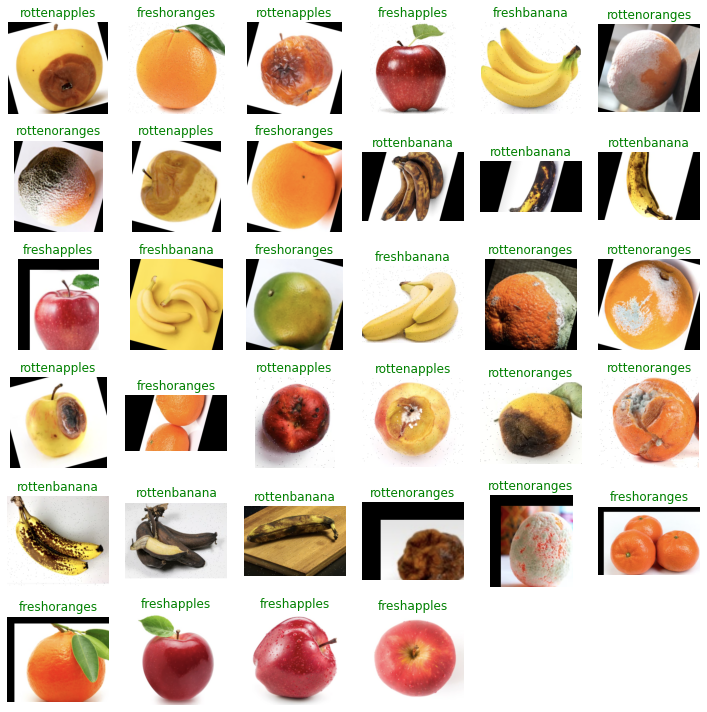

In [50]:

class_labels = {
    0: 'freshapples',
    1: 'freshbanana',
    2: 'freshoranges',
    3: 'rottenapples',
    4: 'rottenbanana',
    5: 'rottenoranges'
}

folder_path = r"E:\projectDataset\tZoghi\db6\testFinal"

image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

image_paths = []
predictions = []
correctness = []

for image_file in image_files:
    print(image_file)
    image_path = os.path.join(folder_path, image_file)
    image = Image.open(image_path)

    input_size = (224, 224)
    image = image.resize(input_size)
    image = np.array(image) / 255.0
    print(image.shape)
    image = np.expand_dims(image, axis=0)

    prediction = model.predict(image)

    predicted_classes = np.argmax(prediction, axis=1)
    predicted_class_labels = [class_labels[class_index] for class_index in predicted_classes]

    ground_truth_label = image_file.split('_')[0]
    correct = ground_truth_label == class_labels[predicted_classes[0]]

    image_paths.append(image_path)
    predictions.append(predicted_class_labels)
    correctness.append(correct)

num_images = len(image_paths)
rows = int(np.ceil(np.sqrt(num_images)))
cols = int(np.ceil(num_images / rows))

fig = plt.figure(figsize=(10, 10))

for i in range(num_images):
    image = Image.open(image_paths[i])

    ax = fig.add_subplot(rows, cols, i + 1)
    ax.imshow(image)
    ax.axis('off')

    title_color = 'green'
    ax.set_title(predictions[i][0], color=title_color)

plt.tight_layout()
plt.show()



In [20]:


from PIL import Image

# Load the image
image_path = r"E:\projectDataset\tZoghi\db6\new\Brudna_plamistosc_jablek_2.jpg"
image = Image.open(image_path)

# Preprocess the image
# Resize the image to the input size expected by your model
input_size = (224, 224)
image = image.resize(input_size)
# Normalize pixel values to the range [0, 1]
image = np.array(image) / 255.0
# Add an extra dimension to represent the batch (assuming single image)
image = np.expand_dims(image, axis=0)

# Pass the image through the model
predictions = model.predict(image)

# Interpret the predictions
predicted_class = np.argmax(predictions)
# map the predicted class to its corresponding label or category

# Print the predicted class
print('Predicted class:', predicted_class)


Predicted class: 4


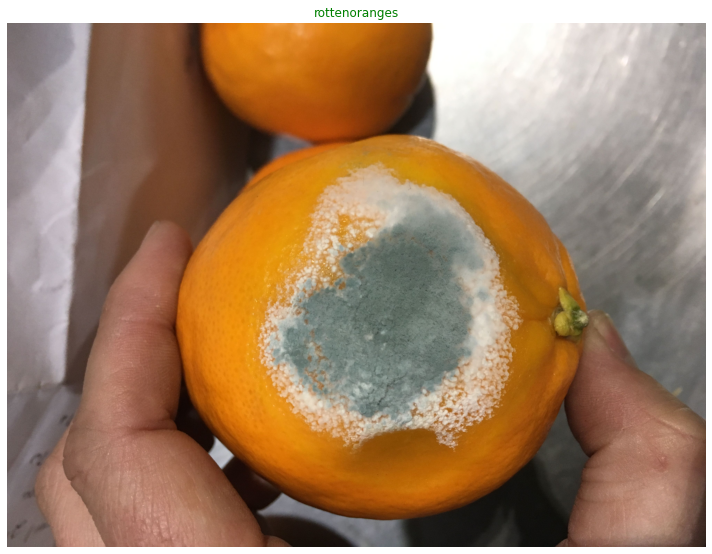

In [42]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os


# Define class labels mapping
class_labels = {
    0: 'freshapples',
    1: 'freshbanana',
    2: 'freshoranges',
    3: 'rottenapples',
    4: 'rottenbanana',
    5: 'rottenoranges'
}

# Folder containing the images
folder_path = r"E:\projectDataset\tZoghi\db6\new"

# Get the list of image files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Prepare empty lists to store predictions and correctness
image_paths = []
predictions = []
correctness = []

# Iterate over the image files
for image_file in image_files:
    # Load the image
    image_path = os.path.join(folder_path, image_file)
    image = Image.open(image_path)

    # Preprocess the image
    input_size = (224, 224)
    image = image.resize(input_size)
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=0)

    # Pass the image through the model
    prediction = model.predict(image)

    # Interpret the prediction
    predicted_classes = np.argmax(prediction, axis=1)
    predicted_class_labels = [class_labels[class_index] for class_index in predicted_classes]

    # Determine correctness
    ground_truth_label = image_file.split('_')[0]
    correct = ground_truth_label == class_labels[predicted_classes[0]]

    # Append the image path, predicted classes, and correctness to the lists
    image_paths.append(image_path)
    predictions.append(predicted_class_labels)
    correctness.append(correct)

# Display the images, predicted classes, and correctness
num_images = len(image_paths)
rows = int(np.ceil(np.sqrt(num_images)))
cols = int(np.ceil(num_images / rows))

fig = plt.figure(figsize=(10, 10))

for i in range(num_images):
    # Load the image
    image = Image.open(image_paths[i])

    # Create a subplot
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.imshow(image)
    ax.axis('off')

    # Set the title color based on correctness
    title_color = 'green'
    ax.set_title(predictions[i][0], color=title_color)

plt.tight_layout()
plt.show()



ValueError: in user code:

    C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: expected axis -1 of input shape to have value 3 but received input with shape (None, 224, 224, 4)
